In [1]:
%matplotlib notebook
import seaborn as sns
sns.set_context('notebook')

/Users/klay6683/miniconda3/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-macosx-10.5-x86_64.egg/matplotlib/__init__.py:866: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from pathlib import Path
datadir = Path('/Users/klay6683/data/iuvs')
hk = pd.read_hdf(str(datadir / 'HK_DB.h5'), 'df')

In [3]:
l1ascan = pd.read_hdf(str(datadir / 'l1a_dark_scan.h5'), 'df')

In [4]:
from iuvs import meta

/Users/klay6683/miniconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [5]:
l1ascan = meta.clean_up_dark_scan(l1ascan)

In [6]:
l1ascan.set_index('TIME_OF_INT', inplace=True)

In [7]:
l1ascan.index

DatetimeIndex(['2015-03-08 05:11:57.868780', '2015-03-08 05:11:59.868780',
               '2015-01-25 20:45:08.450050', '2015-01-25 20:45:23.450060',
               '2015-01-25 20:45:38.450070', '2015-01-25 20:45:53.450070',
               '2015-01-25 20:46:08.450080', '2015-01-25 20:46:23.450090',
               '2015-01-25 20:46:38.450100', '2015-01-25 20:46:53.450110', 
               ...
               '2015-01-25 20:02:00.959480', '2015-01-20 23:15:56.652810',
               '2015-01-20 23:16:01.452800', '2015-07-29 07:13:00.238510',
               '2015-07-29 07:13:15.238520', '2014-09-22 22:43:51.062320',
               '2015-01-25 22:39:42.174830', '2014-10-14 13:47:56.696000',
               '2014-10-14 13:47:58.696000', '2014-10-21 15:31:26.005310'],
              dtype='datetime64[ns]', name='TIME_OF_INT', length=51306, freq=None, tz=None)

In [8]:
l1ascan = l1ascan.sort_index()

In [9]:
l1ascan.loc[(l1ascan.index.year==2015) & (l1ascan.CHANNEL=='MUV'), 'DET_TEMP'].head()

TIME_OF_INT
2015-01-01 00:20:03.693870   -22.3078
2015-01-01 00:20:18.693870   -22.1580
2015-01-01 03:13:22.393330   -23.0568
2015-01-01 03:13:27.193320   -23.0568
2015-01-01 03:13:39.644900   -23.0568
Name: DET_TEMP, dtype: float64

In [10]:
hk.loc['2015-01-01 00:20', 'MUV_DET_TEMP_C'].head()

2015-01-01 00:20:21.156957864   -19.864255
2015-01-01 00:20:51.156982183   -19.848978
Name: MUV_DET_TEMP_C, dtype: float64

In [11]:
timeres = '10min'
df = hk.resample(timeres).dropna(how='all')
std = hk.resample(timeres, how='std').dropna(how='all')

In [12]:
muv = l1ascan[l1ascan.CHANNEL=='MUV']
muvresamp = muv.resample(timeres).dropna(how='all')
muverrors = muv.resample(timeres, how='std').dropna(how='all')

In [13]:
muvresamp.DET_TEMP.size

4823

fig, ax = plt.subplots()
muvresamp.DET_TEMP.plot(style='*', markersize=7, ax=ax, label='CHIP') # yerr=muverrors)
df.MUV_DET_TEMP_C.plot(style='o', markersize=7, ax=ax, label='HK') # yerr=std)
plt.legend(loc='best')

In [14]:
muverrors.DET_TEMP.size

2473

In [29]:
from bokeh.plotting import figure, output_notebook, show, output_file, vplot
from bokeh.models import Range1d


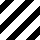
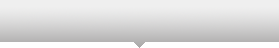
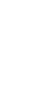
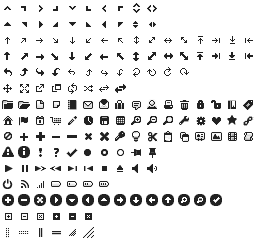
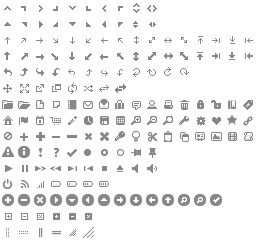
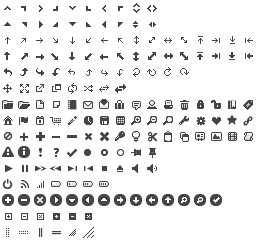
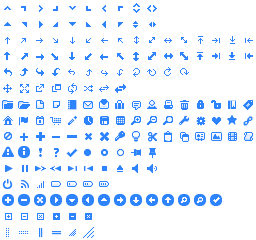
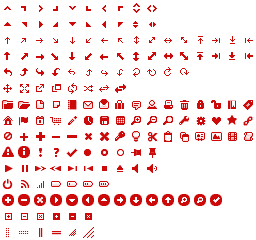
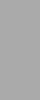
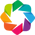
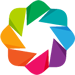
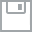
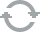
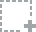
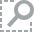
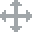
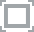
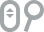

In [42]:
output_notebook()
output_file('/Users/klay6683/Dropbox/DDocuments/IUVS/plots/HK_CHIP_comparison.html',
            title='HK vs CHIP, Temperature comparison')

In [17]:
from bokeh.models.formatters import DatetimeTickFormatter

dtfmt = DatetimeTickFormatter(
    formats=dict(
        hours=["%H:%M"],
        days=["%Y-%m-%d"],
        months=["%b %Y"],
        years=["%b %Y"],
    )
)

In [18]:
from bokeh.palettes import Spectral3

In [19]:
Spectral3

['#99d594', '#ffffbf', '#fc8d59']

In [24]:
ratio = muvresamp.DET_TEMP / df.MUV_DET_TEMP_C

In [37]:
muvresamp['ratio'] = ratio
muvresamp['diff'] = muvresamp.DET_TEMP - df.MUV_DET_TEMP_C

In [43]:
p = figure(width=800, height=400, x_axis_type="datetime",
           title='CHIP vs HK Detector Temperature')

shared_x = muvresamp.index
# MUV data
p.line(shared_x, muvresamp.DET_TEMP, legend='CHIP_DET_TEMP',
       line_width=2, color=Spectral3[0])
p.circle(shared_x, muvresamp.DET_TEMP, color=Spectral3[0],
         fill_color='white', size=8)

# HK data
p.line(df.index, df.MUV_DET_TEMP_C, color=Spectral3[-1], legend='HK_MUV_DET_TEMP',
       line_width=2)
p.circle(df.index, df.MUV_DET_TEMP_C, color=Spectral3[-1], fill_color='white',
         size=8)

p3 = figure(width=800, height=400, x_axis_type='datetime',
            title='Delta between those 2 temperatures.')
p3.circle(shared_x, muvresamp['diff'], legend='diff(CHIP / HK)', size=5,
          color='green')

for fig in [p,p3]:
    fig.axis[0].formatter = dtfmt
    fig.background_fill = 'beige'

all_ = vplot(p,p3)
show(all_)

In [26]:
dtaxis = p.axis[0]

In [35]:
dtaxis.formatter

In [ ]:
df.MUV_DET_TEMP_C.size

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
df.filter(regex='^MUV_').plot(ax=ax[0], yerr=std)

df.filter(regex='^MUV_').plot(ax=ax[1], yerr=std)

# df.filter(regex='^IUVS_._TEMP_C').plot(ax=ax[2],yerr =std)
plt.tight_layout()

In [ ]:
df.columns

In [ ]:
df.filter(regex='^IUVS_._TEMP_C').plot(yerr=std, subplots=True)

# Seaborn PairPlot

In [ ]:
g = sns.PairGrid(df.filter(regex='IUVS_._TEMP_C'))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

In [ ]:
tips.day.value_counts().index

In [ ]:
attend = sns.load_dataset('attention').query('subject <=12')

In [ ]:
attend